(90, 30)
(6, 30)
[30, 22, 15, 22, 30]
Epoch 1/100
3/3 [==============================] - 0s 1ms/step - loss: 10.6199
Epoch 2/100
3/3 [==============================] - 0s 815us/step - loss: 8.4227
Epoch 3/100
3/3 [==============================] - 0s 804us/step - loss: 8.2163
Epoch 4/100
3/3 [==============================] - 0s 805us/step - loss: 8.1222
Epoch 5/100
3/3 [==============================] - 0s 782us/step - loss: 8.0316
Epoch 6/100
3/3 [==============================] - 0s 795us/step - loss: 7.9757
Epoch 7/100
3/3 [==============================] - 0s 805us/step - loss: 7.9384
Epoch 8/100
3/3 [==============================] - 0s 824us/step - loss: 7.9004
Epoch 9/100
3/3 [==============================] - 0s 811us/step - loss: 7.8699
Epoch 10/100
3/3 [==============================] - 0s 825us/step - loss: 7.8482
Epoch 11/100
3/3 [==============================] - 0s 821us/step - loss: 7.8301
Epoch 12/100
3/3 [==============================] - 0s 824us/step - loss: 7.8141


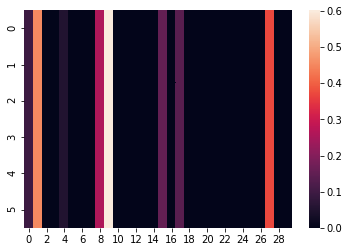

actual data:
(6, 30)


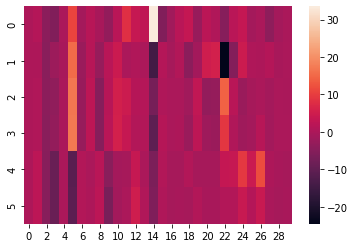

In [7]:
import tensorflow as tf
import numpy as np
import math

from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
from matplotlib import pyplot as plt

xs = np.load('transformed_voxels.npy')
ys = np.load('transformed_distmats.npy')
xs_train = xs[:90]
ys_train = ys[:90]
xs_test = xs[90:]
ys_test = ys[90:]
print(xs_train.shape)
print(xs_test.shape)

model = tf.keras.Sequential()

#network parameters
depth = 5
thinnest = 1

#calculating size of each layer
input_size = output_size = xs.shape[1]
#temp thinnest size
thinnest = int(input_size/2)
odd_depth = depth%2
thinnest_depth = math.ceil((depth-2)/2)
reduce_by = (input_size - thinnest)/thinnest_depth
neuron_amount = []

neurons = input_size
for i in range(math.floor(depth/2)):
    neuron_amount.append(round(neurons))
    neurons -= reduce_by

neurons += reduce_by    
if(odd_depth):
    neuron_amount.append(thinnest)
    
for i in range(math.floor(depth/2)):
    neuron_amount.append(round(neurons))
    neurons += reduce_by
    
print(neuron_amount)

#building hourglass net
model.add(tf.keras.Input(shape=(input_size)))
for neuron in neuron_amount:
    model.add(tf.keras.layers.Dense(neuron, activation='relu'))

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(xs_train, ys_train, epochs=100)

test = model.predict(xs_test)

print('model prediction:')
print(test.shape)
sns.heatmap(test)
plt.show()
print('actual data:')
print(ys_test.shape)
sns.heatmap(ys_test)
plt.show()